In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,Activation,LeakyReLU
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax
from tensorflow.keras.activations import sigmoid,relu,softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
path = '/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset'


In [5]:
train_data_path = '/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train'
test_data_path = '/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Test'

In [6]:
img_width , img_height = 150,150

In [7]:
from glob import glob
glob('/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train/*')

['/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train/Clay_Soil',
 '/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train/Black_Soil',
 '/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train/Alluvial_Soil',
 '/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train/Red_Soil']

In [8]:
from glob import glob
glob('/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Test/*')

['/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Test/Clay_Soil',
 '/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Test/Alluvial_Soil',
 '/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Test/Red_Soil',
 '/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Test/Black_Soil']

In [9]:
labels = ['Alluvial_Soil','Black_Soil','Clay_Soil','Red_Soil']

In [10]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               horizontal_flip=True,
                               zoom_range=0.2)
                               
                               
test_gen = ImageDataGenerator(rescale=1./255)

In [11]:
train = train_gen.flow_from_directory(train_data_path,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=32)
test = test_gen.flow_from_directory(test_data_path,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=32)



Found 715 images belonging to 4 classes.
Found 188 images belonging to 4 classes.


In [12]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
epochs=15

In [16]:
model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/15
23/23 [==============================] - 716s 31s/step - loss: 0.4189 - accuracy: 0.5664 - val_loss: 0.3085 - val_accuracy: 0.7128
Epoch 2/15
23/23 [==============================] - 6s 258ms/step - loss: 0.2166 - accuracy: 0.8350 - val_loss: 0.1994 - val_accuracy: 0.8191
Epoch 3/15
23/23 [==============================] - 6s 250ms/step - loss: 0.1583 - accuracy: 0.8643 - val_loss: 0.2136 - val_accuracy: 0.8298
Epoch 4/15
23/23 [==============================] - 6s 250ms/step - loss: 0.1474 - accuracy: 0.8741 - val_loss: 0.2494 - val_accuracy: 0.7979
Epoch 5/15
23/23 [==============================] - 6s 250ms/step - loss: 0.1665 - accuracy: 0.8629 - val_loss: 0.1450 - val_accuracy: 0.8936
Epoch 6/15
23/23 [==============================] - 6s 253ms/step - loss: 0.1267 - accuracy: 0.8909 - val_loss: 0.1313 - val_accuracy: 0.8989
Epoch 7/15
23/23 [==============================] - 6s 255ms/step - loss: 0.1211 - accuracy: 0.8951 - val_loss: 0.2263 - val_accuracy: 0.7819
Epoch 

In [17]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
train_loss = model.history.history['loss']
train_loss

[0.41891932487487793,
 0.21658162772655487,
 0.15830498933792114,
 0.14737582206726074,
 0.16650132834911346,
 0.12674063444137573,
 0.12111258506774902,
 0.10401350259780884,
 0.09615400433540344,
 0.09857674688100815,
 0.10141685605049133,
 0.07240208983421326,
 0.08012941479682922,
 0.07387996464967728,
 0.08198147267103195]

In [19]:
test_loss = model.history.history['val_loss']
test_loss

[0.3085169792175293,
 0.1993875354528427,
 0.21359848976135254,
 0.24935631453990936,
 0.1450180858373642,
 0.13126753270626068,
 0.2262868732213974,
 0.10828500986099243,
 0.10662771761417389,
 0.20185892283916473,
 0.14914140105247498,
 0.26936790347099304,
 0.15284238755702972,
 0.10298405587673187,
 0.13778744637966156]

In [20]:
train_acc = model.history.history['accuracy']
train_acc

[0.5664335489273071,
 0.8349650502204895,
 0.8643356561660767,
 0.8741258978843689,
 0.8629370331764221,
 0.8909090757369995,
 0.8951048851013184,
 0.9146853089332581,
 0.9230769276618958,
 0.9230769276618958,
 0.9202797412872314,
 0.9440559148788452,
 0.9440559148788452,
 0.9398601651191711,
 0.9328671097755432]

In [21]:
test_acc = model.history.history['val_accuracy']
test_acc

[0.7127659320831299,
 0.8191489577293396,
 0.8297872543334961,
 0.7978723645210266,
 0.8936170339584351,
 0.8989361524581909,
 0.7819148898124695,
 0.9255319237709045,
 0.9308510422706604,
 0.8670212626457214,
 0.8829787373542786,
 0.8244680762290955,
 0.8989361524581909,
 0.936170220375061,
 0.9042553305625916]

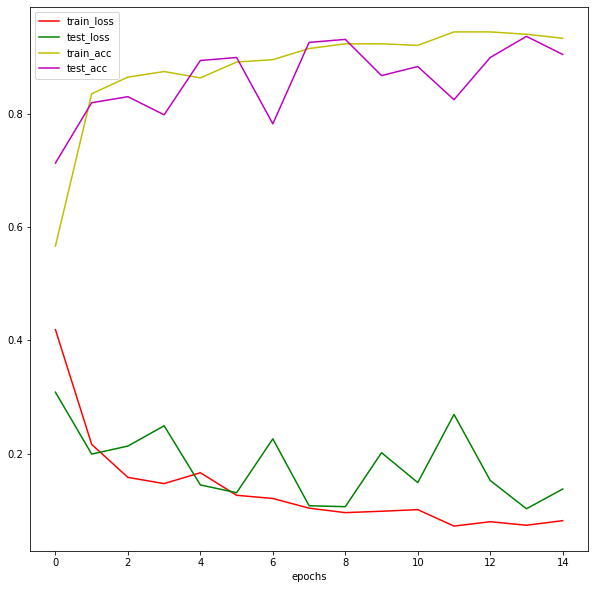

In [22]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(epochs),train_loss,color='r',label='train_loss')
plt.plot(np.arange(epochs),test_loss,color='g',label='test_loss')
plt.plot(np.arange(epochs),train_acc,color='y',label='train_acc')
plt.plot(np.arange(epochs),test_acc,color='m',label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.show()


In [23]:
loss,acc = model.evaluate(test)

6/6 [==============================] - 0s 82ms/step - loss: 0.1378 - accuracy: 0.9043


In [24]:
print(loss)
print(acc)

0.13778744637966156
0.9042553305625916


In [25]:
labels

['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil']

In [35]:
from keras.preprocessing import image

In [55]:

def fun(path):
  img = cv2.imread(path)
  im_resize = cv2.resize(img,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
  plt.imshow(cv2.cvtColor(im_resize,cv2.COLOR_BGR2RGB))


  image_pred = image.load_img(path,target_size=(img_height,img_width))
  image_pred = image.img_to_array(image_pred)
  a = np.expand_dims(image_pred,axis=0)
  result = model.predict_classes(a)
  prob = model.predict_proba(a)
  print('prediction class',result)
  print('probability:{}'.format(prob[0]))
  if result[0]==0:
    prediction='Alluvial_Soil'
  elif result[0]==1:
    prediction='Black_Soil'
  elif result[0]==2:
    prediction='Clay_Soil'
  else:
    prediction = 'Red_Soil'
    
    
  print('predicition_class:',prediction)

prediction class [0]
probability:[1. 0. 0. 0.]
predicition_class: Alluvial_Soil


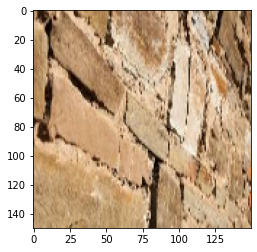

In [56]:
fun('/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train/Alluvial_Soil/Alluvial_11.jpg')

prediction class [0]
probability:[1. 0. 0. 0.]
predicition_class: Alluvial_Soil


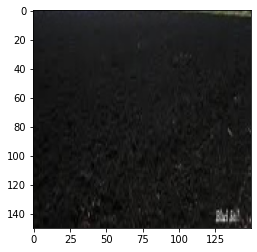

In [57]:
fun('/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train/Black_Soil/Black_1.jpg')

prediction class [2]
probability:[0. 0. 1. 0.]
predicition_class: Clay_Soil


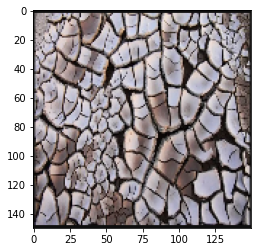

In [58]:
fun('/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train/Clay_Soil/Clay_1.jpg')

prediction class [3]
probability:[0. 0. 0. 1.]
predicition_class: Red_Soil


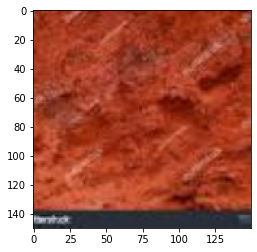

In [59]:
fun('/content/drive/MyDrive/Deep learning CNN  Data Sets/soil Dataset/Soil_Dataset/Train/Red_Soil/Red_1.jpg')